In [1]:
import cv2

# Load the pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Read the image
image = cv2.imread("test.jpg")
if image is None:
    print("Image not found. Check the file path.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Continue with detection...

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Show result
cv2.imwrite("detected_faces.jpg", image)
cv2.imshow("Detected Faces", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


True

In [2]:
import cv2

# Load the Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Show output
    cv2.imshow("Face Detection (Press Q to exit)", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [8]:
import cv2
import os
import tkinter as tk
from tkinter import filedialog, messagebox, Scrollbar, Canvas, Frame
from PIL import Image, ImageTk
import uuid  # To generate unique filenames

# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Create output folder
os.makedirs("detected_faces", exist_ok=True)

# GUI setup
root = tk.Tk()
root.title("Face Detection App")

# Scrollable frame for gallery
gallery_frame = Frame(root)
canvas = Canvas(gallery_frame, width=650, height=300)
scroll_y = Scrollbar(gallery_frame, orient="vertical", command=canvas.yview)
scrollable_frame = Frame(canvas)

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(scrollregion=canvas.bbox("all"))
)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scroll_y.set)

gallery_frame.pack()
canvas.pack(side="left")
scroll_y.pack(side="right", fill="y")

# Panel for current image
current_image_panel = tk.Label(root)
current_image_panel.pack()

def delete_image(filename, widget_frame):
    os.remove(filename)
    widget_frame.destroy()

def add_to_gallery(saved_path):
    img = Image.open(saved_path)
    img.thumbnail((150, 150))
    img_tk = ImageTk.PhotoImage(img)

    frame = tk.Frame(scrollable_frame)
    frame.pack(pady=5)

    lbl = tk.Label(frame, image=img_tk)
    lbl.image = img_tk
    lbl.pack(side="left")

    btn = tk.Button(frame, text="Delete", command=lambda: delete_image(saved_path, frame))
    btn.pack(side="left", padx=10)

def detect_faces(image_path):
    img = cv2.imread(image_path)
    if img is None:
        messagebox.showerror("Error", "Cannot read the selected image.")
        return

    # Resize image to fixed width
    fixed_width = 600
    height = int(img.shape[0] * (fixed_width / img.shape[1]))
    img = cv2.resize(img, (fixed_width, height))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save the result image with a unique filename
    filename = f"detected_faces/face_{uuid.uuid4().hex}.jpg"
    cv2.imwrite(filename, img)
    add_to_gallery(filename)

    # # Display in main panel
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img_pil = Image.fromarray(img_rgb)
    # img_tk = ImageTk.PhotoImage(img_pil)

    # current_image_panel.config(image=img_tk)
    # current_image_panel.image = img_tk

def open_image():
    file_path = filedialog.askopenfilename(
        filetypes=[("Image Files", "*.jpg *.jpeg *.png *.bmp")]
    )
    if file_path:
        detect_faces(file_path)

# Upload button
btn = tk.Button(root, text="Upload Image", command=open_image)
btn.pack(pady=10)

root.mainloop()


In [13]:
import cv2
import os
import tkinter as tk
from tkinter import filedialog, messagebox, Scrollbar, Canvas, Frame
from PIL import Image, ImageTk
import uuid

# Create folder for saving images
os.makedirs("detected_faces", exist_ok=True)

# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# GUI setup
root = tk.Tk()
root.title("Face Detection App with Webcam")

# Webcam flag and video source
video_stream = None
webcam_running = False

# --- Scrollable Gallery Section ---
gallery_frame = Frame(root)
canvas = Canvas(gallery_frame, width=650, height=300)
scroll_y = Scrollbar(gallery_frame, orient="vertical", command=canvas.yview)
scrollable_frame = Frame(canvas)

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(scrollregion=canvas.bbox("all"))
)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scroll_y.set)

gallery_frame.pack()
canvas.pack(side="left")
scroll_y.pack(side="right", fill="y")

# --- Live Feed Panel ---
live_panel = tk.Label(root)
live_panel.pack()

def delete_image(filename, widget_frame):
    os.remove(filename)
    widget_frame.destroy()

def add_to_gallery(saved_path):
    img = Image.open(saved_path)
    img.thumbnail((150, 150))
    img_tk = ImageTk.PhotoImage(img)

    frame = tk.Frame(scrollable_frame)
    frame.pack(pady=5)

    lbl = tk.Label(frame, image=img_tk)
    lbl.image = img_tk
    lbl.pack(side="left")

    btn = tk.Button(frame, text="Delete", command=lambda: delete_image(saved_path, frame))
    btn.pack(side="left", padx=10)

def capture_webcam_frame():
    if video_stream is not None:
        ret, frame = video_stream.read()
        if ret:
            # Resize
            frame = cv2.resize(frame, (300, 300))

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.1, 5)
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            filename = f"detected_faces/webcam_{uuid.uuid4().hex}.jpg"
            cv2.imwrite(filename, frame)
            add_to_gallery(filename)
            messagebox.showinfo("Saved", f"Captured image saved as:\n{filename}")

def show_webcam():
    global video_stream, webcam_running
    if not webcam_running:
        video_stream = cv2.VideoCapture(0)
        webcam_running = True
        update_webcam_frame()

def update_webcam_frame():
    global webcam_running
    if video_stream is not None and webcam_running:
        ret, frame = video_stream.read()
        if ret:
            # Resize to fixed width
            frame = cv2.resize(frame, (300, 300))

            # Face detection
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.1, 5)
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Convert to RGB for Tkinter
            img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img_pil = Image.fromarray(img_rgb)
            img_tk = ImageTk.PhotoImage(img_pil)

            live_panel.config(image=img_tk)
            live_panel.image = img_tk

        root.after(10, update_webcam_frame)

def stop_webcam():
    global webcam_running
    webcam_running = False
    if video_stream is not None:
        video_stream.release()
    live_panel.config(image='')

def detect_faces_from_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        messagebox.showerror("Error", "Cannot read image.")
        return
    
    img = cv2.resize(img, (300, 300))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    filename = f"detected_faces/image_{uuid.uuid4().hex}.jpg"
    cv2.imwrite(filename, img)
    add_to_gallery(filename)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)
    img_tk = ImageTk.PhotoImage(img_pil)

    live_panel.config(image=img_tk)
    live_panel.image = img_tk

def open_image():
    file_path = filedialog.askopenfilename(
        filetypes=[("Image Files", "*.jpg *.jpeg *.png *.bmp")]
    )
    if file_path:
        detect_faces_from_image(file_path)

# Buttons
btn_frame = Frame(root)
btn_frame.pack(pady=10)

tk.Button(btn_frame, text="Upload Image", command=open_image).grid(row=0, column=0, padx=10)
tk.Button(btn_frame, text="Start Webcam", command=show_webcam).grid(row=0, column=1, padx=10)
tk.Button(btn_frame, text="Capture Frame", command=capture_webcam_frame).grid(row=0, column=2, padx=10)
tk.Button(btn_frame, text="Stop Webcam", command=stop_webcam).grid(row=0, column=3, padx=10)

root.protocol("WM_DELETE_WINDOW", lambda: (stop_webcam(), root.destroy()))
root.mainloop()


In [14]:
import cv2

modelFile = "res10_300x300_ssd_iter_140000.caffemodel"
configFile = "deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)


In [15]:
def detect_faces_dnn(frame, conf_threshold=0.7):
    h, w = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), 
                                 (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    boxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            box = detections[0, 0, i, 3:7] * [w, h, w, h]
            (x1, y1, x2, y2) = box.astype("int")
            boxes.append((x1, y1, x2-x1, y2-y1))
            # Draw rectangle
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return frame, boxes

In [16]:
def update_webcam_frame():
    global webcam_running
    if video_stream is not None and webcam_running:
        ret, frame = video_stream.read()
        if ret:
            frame = cv2.resize(frame, (600, 300))
            frame, faces = detect_faces_dnn(frame)

            img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img_pil = Image.fromarray(img_rgb)
            img_tk = ImageTk.PhotoImage(img_pil)

            live_panel.config(image=img_tk)
            live_panel.image = img_tk

        root.after(10, update_webcam_frame)

In [1]:
import cv2
import os
import uuid
import tkinter as tk
from tkinter import filedialog, messagebox, Scrollbar, Canvas, Frame
from PIL import Image, ImageTk

# Load OpenCV DNN face detector
model_file = "res10_300x300_ssd_iter_140000.caffemodel"
config_file = "deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(config_file, model_file)

# Directory to store saved images
os.makedirs("detected_faces", exist_ok=True)
os.makedirs("face_crops", exist_ok=True)

# GUI setup
root = tk.Tk()
root.title("Face Detection (DNN) GUI App")
root.geometry("700x700")

# Scrollable Gallery Section
gallery_frame = Frame(root)
canvas = Canvas(gallery_frame, width=650, height=280)
scroll_y = Scrollbar(gallery_frame, orient="vertical", command=canvas.yview)
scrollable_frame = Frame(canvas)

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(scrollregion=canvas.bbox("all"))
)
canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scroll_y.set)

gallery_frame.pack()
canvas.pack(side="left")
scroll_y.pack(side="right", fill="y")

# Live webcam preview
live_panel = tk.Label(root)
live_panel.pack()

video_stream = None
webcam_running = False

def detect_faces_dnn(frame, conf_threshold=0.7, return_crops=False):
    h, w = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
                                 (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    boxes = []
    crops = []

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            box = detections[0, 0, i, 3:7] * [w, h, w, h]
            (x1, y1, x2, y2) = box.astype("int")
            boxes.append((x1, y1, x2 - x1, y2 - y1))

            # Draw rectangle on original frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

            if return_crops:
                face_crop = frame[max(0, y1):y2, max(0, x1):x2]
                if face_crop.size > 0:
                    crops.append(face_crop)

    if return_crops:
        return frame, boxes, crops
    else:
        return frame, boxes

def delete_image(filename, widget_frame):
    if os.path.exists(filename):
        os.remove(filename)
    widget_frame.destroy()

def add_to_gallery(saved_path):
    img = Image.open(saved_path)
    img.thumbnail((150, 150))
    img_tk = ImageTk.PhotoImage(img)

    frame = tk.Frame(scrollable_frame)
    frame.pack(pady=5)

    lbl = tk.Label(frame, image=img_tk)
    lbl.image = img_tk
    lbl.pack(side="left")

    btn = tk.Button(frame, text="Delete", command=lambda: delete_image(saved_path, frame))
    btn.pack(side="left", padx=10)

def show_webcam():
    global video_stream, webcam_running
    if not webcam_running:
        video_stream = cv2.VideoCapture(0)
        webcam_running = True
        update_webcam_frame()

def update_webcam_frame():
    global webcam_running
    if video_stream is not None and webcam_running:
        ret, frame = video_stream.read()
        if ret:
            frame = cv2.resize(frame, (300, 300))
            frame, faces = detect_faces_dnn(frame)

            img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img_pil = Image.fromarray(img_rgb)
            img_tk = ImageTk.PhotoImage(img_pil)

            live_panel.config(image=img_tk)
            live_panel.image = img_tk

        root.after(10, update_webcam_frame)

def capture_webcam_frame():
    if video_stream is not None:
        ret, frame = video_stream.read()
        if ret:
            frame = cv2.resize(frame, (600, 300))
            frame, faces, crops = detect_faces_dnn(frame, return_crops=True)

            base_filename = f"webcam_{uuid.uuid4().hex}"
            full_path = f"detected_faces/{base_filename}.jpg"
            cv2.imwrite(full_path, frame)
            add_to_gallery(full_path)

            for i, crop in enumerate(crops):
                crop_path = f"face_crops/{base_filename}_face{i + 1}.jpg"
                cv2.imwrite(crop_path, crop)

            messagebox.showinfo("Saved", f"Captured with {len(crops)} face(s) saved.")

def stop_webcam():
    global webcam_running
    webcam_running = False
    if video_stream is not None:
        video_stream.release()
    live_panel.config(image='')

def detect_faces_from_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        messagebox.showerror("Error", "Cannot read image.")
        return

    img = cv2.resize(img, (600, 300))
    img, faces, crops = detect_faces_dnn(img, return_crops=True)

    base_filename = f"image_{uuid.uuid4().hex}"
    full_path = f"detected_faces/{base_filename}.jpg"
    cv2.imwrite(full_path, img)
    add_to_gallery(full_path)

    for i, crop in enumerate(crops):
        crop_path = f"face_crops/{base_filename}_face{i + 1}.jpg"
        cv2.imwrite(crop_path, crop)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)
    img_tk = ImageTk.PhotoImage(img_pil)

    live_panel.config(image=img_tk)
    live_panel.image = img_tk

    messagebox.showinfo("Saved", f"{len(crops)} face(s) cropped and saved.")

def open_image():
    file_path = filedialog.askopenfilename(
        filetypes=[("Image Files", "*.jpg *.jpeg *.png *.bmp")]
    )
    if file_path:
        detect_faces_from_image(file_path)

# Buttons
btn_frame = Frame(root)
btn_frame.pack(pady=10)

tk.Button(btn_frame, text="Upload Image", command=open_image).grid(row=0, column=0, padx=10)
tk.Button(btn_frame, text="Start Webcam", command=show_webcam).grid(row=0, column=1, padx=10)
tk.Button(btn_frame, text="Capture Frame", command=capture_webcam_frame).grid(row=0, column=2, padx=10)
tk.Button(btn_frame, text="Stop Webcam", command=stop_webcam).grid(row=0, column=3, padx=10)

# Clean exit
root.protocol("WM_DELETE_WINDOW", lambda: (stop_webcam(), root.destroy()))
root.mainloop()


In [14]:
import os
import shutil
import random
from glob import glob

# Constants
SOURCE_PATHS = [
    r"archive\MicroExpression\fer2013\fer2013\Training",
    r"archive\MicroExpression\ck+\ck+"
]
DEST_PATH = "archive/MicroExpression_Split"
EMOTIONS = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sad', 'surprised']
TRAIN_SPLIT = 0.8  # 80% train, 20% test

# Create destination directories
for split in ['training', 'test']:
    for emotion in EMOTIONS:
        os.makedirs(os.path.join(DEST_PATH, split, emotion), exist_ok=True)

print("[INFO] Collecting and splitting images...")
# Collect and split images
for emotion in EMOTIONS:
    all_images = []
    
    for src in SOURCE_PATHS:
        emotion_path = os.path.join(src, emotion)
        if os.path.exists(emotion_path):
            all_images.extend(glob(os.path.join(emotion_path, "*")))

    random.shuffle(all_images)
    split_index = int(len(all_images) * TRAIN_SPLIT)
    train_images = all_images[:split_index]
    test_images = all_images[split_index:]

    for img in train_images:
        shutil.copy(img, os.path.join(DEST_PATH, "training", emotion))
    for img in test_images:
        shutil.copy(img, os.path.join(DEST_PATH, "test", emotion))

    print(f"[{emotion}] Total: {len(all_images)}, Train: {len(train_images)}, Test: {len(test_images)}")

print("[DONE] Datasets merged and split successfully.")

[INFO] Collecting and splitting images...
[anger] Total: 4130, Train: 3304, Test: 826
[contempt] Total: 54, Train: 43, Test: 11
[disgust] Total: 613, Train: 490, Test: 123
[fear] Total: 4172, Train: 3337, Test: 835
[happy] Total: 7422, Train: 5937, Test: 1485
[sad] Total: 4914, Train: 3931, Test: 983
[surprised] Total: 3420, Train: 2736, Test: 684
[DONE] Datasets merged and split successfully.


Found 19778 images belonging to 7 classes.
Found 4947 images belonging to 7 classes.
Epoch 1/15
619/619 ━━━━━━━━━━━━━━━━━━━━ 658s 1s/step - accuracy: 0.3465 - loss: 1.5849 - val_accuracy: 0.4811 - val_loss: 1.2946
Epoch 2/15
619/619 ━━━━━━━━━━━━━━━━━━━━ 79s 128ms/step - accuracy: 0.4861 - loss: 1.2986 - val_accuracy: 0.5417 - val_loss: 1.1490
Epoch 3/15
619/619 ━━━━━━━━━━━━━━━━━━━━ 68s 110ms/step - accuracy: 0.5421 - loss: 1.1721 - val_accuracy: 0.5646 - val_loss: 1.0925
Epoch 4/15
619/619 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.5636 - loss: 1.1029 - val_accuracy: 0.5799 - val_loss: 1.0657
Epoch 5/15
619/619 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.5826 - loss: 1.0619 - val_accuracy: 0.5963 - val_loss: 1.0365
Epoch 6/15
619/619 ━━━━━━━━━━━━━━━━━━━━ 57s 93ms/step - accuracy: 0.6022 - loss: 1.0270 - val_accuracy: 0.5937 - val_loss: 1.0319
Epoch 7/15
619/619 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.6244 - loss: 0.9783 - val_accuracy: 0.6018 - val_loss: 1.0134
Epo

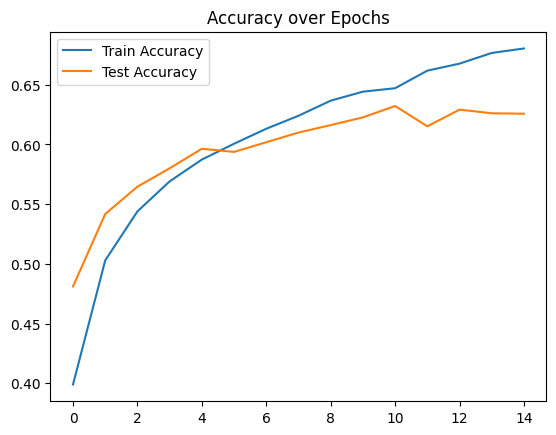

In [15]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 15
DATASET_PATH = "archive/MicroExpression_Split"  # change if needed

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "training"),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "test"),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical'
)

# Model
model = models.Sequential([
    layers.Input(shape=(*IMAGE_SIZE, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=test_data
)

# Save model
model.save("micro_expression_model.h5")

# Plot accuracy & loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

[INFO] Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


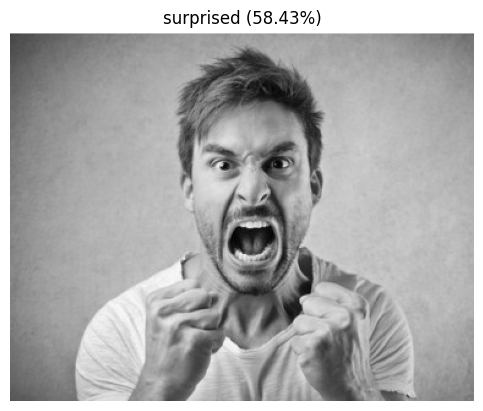

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


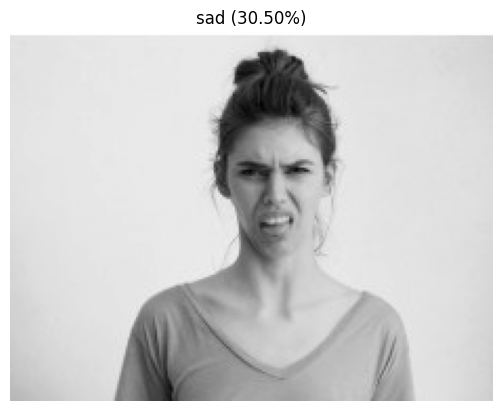

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


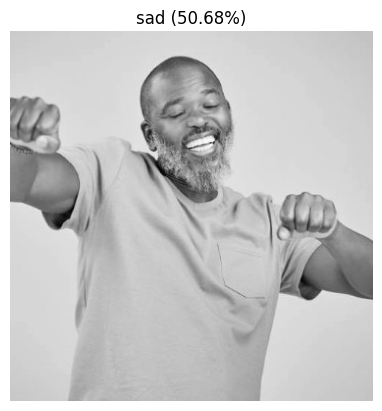

In [19]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (96, 96)
MODEL_PATH = "micro_expression_model.h5"
CLASS_NAMES = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sad', 'surprised']  # Adjust if needed

# Load model
model = tf.keras.models.load_model(MODEL_PATH)
print("[INFO] Model loaded successfully.")

# Function to preprocess and predict
def predict_expression(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"[ERROR] Could not load image: {image_path}")
        return

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (64, 64))  # MATCH TRAINING SIZE

    img_normalized = img_resized.astype("float32") / 255.0
    img_array = np.expand_dims(img_normalized, axis=-1)  # Add channel dim (64,64,1)
    img_array = np.expand_dims(img_array, axis=0)        # Add batch dim (1,64,64,1)

    prediction = model.predict(img_array)
    predicted_class = CLASS_NAMES[np.argmax(prediction)]
    confidence = np.max(prediction)

    plt.imshow(img_gray, cmap='gray')
    plt.title(f"{predicted_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Test sample images
sample_images = [
    "samples/test1.jpg",
    "samples/test2.jpg",
    "samples/test3.jpg"
]

for image_path in sample_images:
    predict_expression(image_path)


In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("micro_expression_model.h5")

# Class labels
CLASS_NAMES = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sad', 'surprised']
IMAGE_SIZE = (64, 64)  # match with training

# Load OpenCV's pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam
cap = cv2.VideoCapture(0)
print("[INFO] Press 'q' to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Extract and preprocess the face region
        face_img = gray[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, IMAGE_SIZE)
        face_img = face_img.astype("float32") / 255.0
        face_img = np.expand_dims(face_img, axis=-1)  # channel dimension
        face_img = np.expand_dims(face_img, axis=0)   # batch dimension

        # Predict emotion
        preds = model.predict(face_img, verbose=0)
        label = CLASS_NAMES[np.argmax(preds)]
        confidence = np.max(preds)

        # Draw rectangle and label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, f"{label} ({confidence*100:.1f}%)", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow("Micro-Expression Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[INFO] Press 'q' to quit
